In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import networkx as nx


In [2]:
# Function to draw the graph
def draw_colored_graph_straight_line(states, adjacency_matrix, title="", file=None):
    G = nx.Graph()
    n_nodes = len(states)
    
    for i in range(n_nodes):
        G.add_node(i, color='red' if states[i] == 0 else 'green')
    
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if adjacency_matrix[i, j] > 0:
                G.add_edge(i, j)
    
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    pos = {i: (i, 0) for i in range(n_nodes)}
    
    plt.figure(figsize=(8, 2))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
    plt.title(title)
    if file is not None:
        plt.savefig(title + '.jpg')
    plt.show()


In [3]:
# Number of nodes in the line graph
num_nodes = 10
num_iterations = 200

# Define colors: 0 = Red, 1 = Green
colors = [0, 1]

# Initialize all nodes to Red (0)
states = np.zeros(num_nodes, dtype=int)

# Adjacency matrix for a line graph
W = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes - 1):
    W[i, i + 1] = 1
    W[i + 1, i] = 1


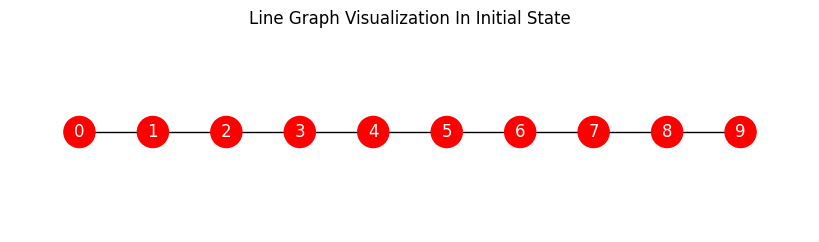

In [4]:
# Draw the initial state of the graph
title = "Line Graph Visualization In Initial State"
draw_colored_graph_straight_line(states, W, title=title, file=1)


In [5]:
# Cost function
def cost(s, Xj):
    return int(s == Xj)

In [6]:
# Potential function
def potential(X):
    return 0.5 * sum(W[i, j] * cost(X[i], X[j]) for i in range(num_nodes) for j in range(num_nodes) if W[i, j] == 1)


In [7]:
# Run the simulation
potential_values = []
for t in range(1, num_iterations + 1):
    eta_t = t / 50  # Inverse noise function
    i = np.random.randint(0, num_nodes)  # Random node selection
    
    # Compute probability for each color
    exp_values = np.array([np.exp(-eta_t * sum(W[i, j] * cost(c, states[j]) for j in range(num_nodes))) for c in colors])
    probabilities = exp_values / np.sum(exp_values)
    
    # Update color
    states[i] = np.random.choice(colors, p=probabilities)
    
    # Store potential function value
    potential_values.append(potential(states))


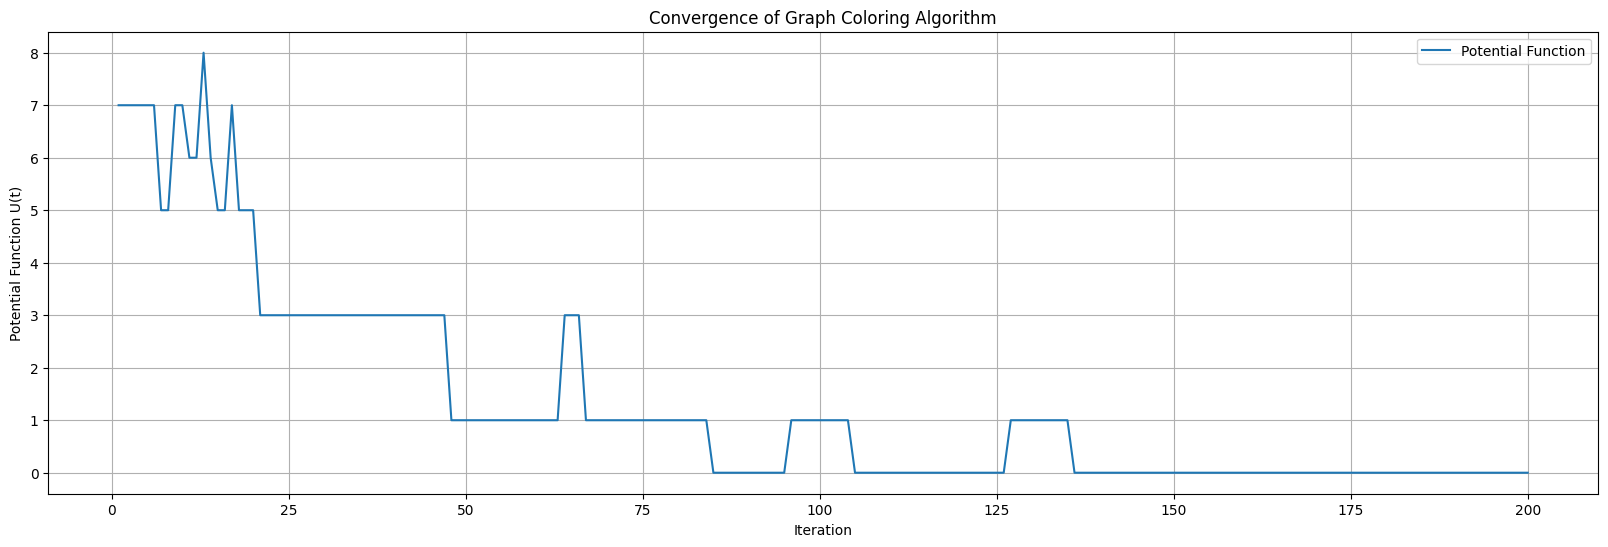

In [10]:
# Plot the potential function over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_iterations + 1), potential_values, label='Potential Function')
plt.xlabel('Iteration')
plt.ylabel('Potential Function U(t)')
plt.title('Convergence of Graph Coloring Algorithm')
plt.legend()
plt.grid()
plt.savefig("2_a_Potential Function Over Time.jpg")
plt.show()


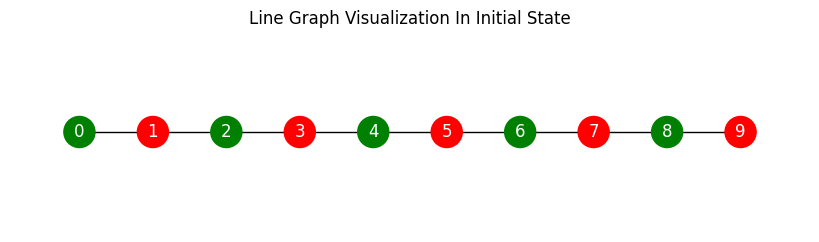

In [9]:

title = "Line Graph Visualization In Initial State"
draw_colored_graph_straight_line(states, W, title=title, file=1)
